# Data Preprocessing Tools

## Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

## Importing the dataset

In [ ]:
df = pd.read_csv('../data/train.csv')

print(df.info())
print(df.columns)
print(df.isnull().sum())
print(df.head(10))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28800 entries, 0 to 28799
Data columns (total 60 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      28800 non-null  int64  
 1   dri_score               28646 non-null  object 
 2   psych_disturb           26738 non-null  object 
 3   cyto_score              20732 non-null  object 
 4   diabetes                26681 non-null  object 
 5   hla_match_c_high        24180 non-null  float64
 6   hla_high_res_8          22971 non-null  float64
 7   tbi_status              28800 non-null  object 
 8   arrhythmia              26598 non-null  object 
 9   hla_low_res_6           25530 non-null  float64
 10  graft_type              28800 non-null  object 
 11  vent_hist               28541 non-null  object 
 12  renal_issue             26885 non-null  object 
 13  pulm_severe             26665 non-null  object 
 14  prim_disease_hct        28800 non-null

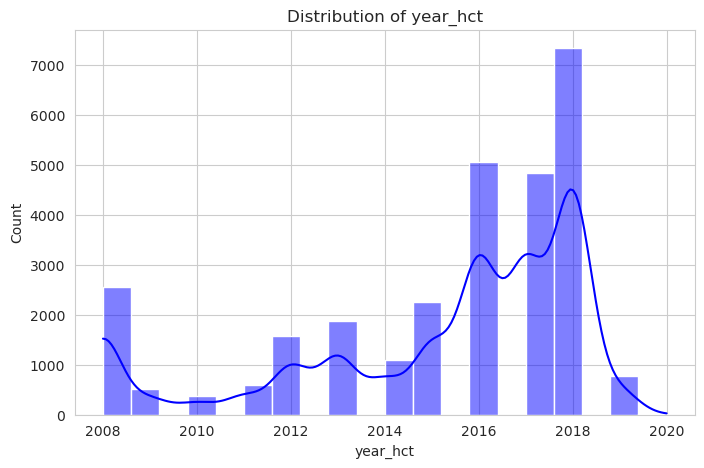

(28800, 21)
Index(['hla_match_c_high', 'hla_high_res_8', 'hla_low_res_6', 'hla_high_res_6',
       'hla_high_res_10', 'hla_match_dqb1_high', 'hla_nmdp_6',
       'hla_match_c_low', 'hla_match_drb1_low', 'hla_match_dqb1_low',
       'hla_match_a_high', 'donor_age', 'hla_match_b_low', 'age_at_hct',
       'hla_match_a_low', 'hla_match_b_high', 'comorbidity_score',
       'karnofsky_score', 'hla_low_res_8', 'hla_match_drb1_high',
       'hla_low_res_10'],
      dtype='object')
Important features from Lasso Regression (non-zero coefficients):
hla_match_drb1_low     0.005523
age_at_hct             0.091057
comorbidity_score      0.039554
karnofsky_score       -0.009979
hla_match_drb1_high    0.015360
dtype: float64
Explained variance by PCA components: [0.59874784 0.07023499 0.04744411 0.04013404 0.03696046]


/tmp/ipykernel_37147/1466880558.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lasso_coef_sorted.values, y=lasso_coef_sorted.index, palette="viridis")


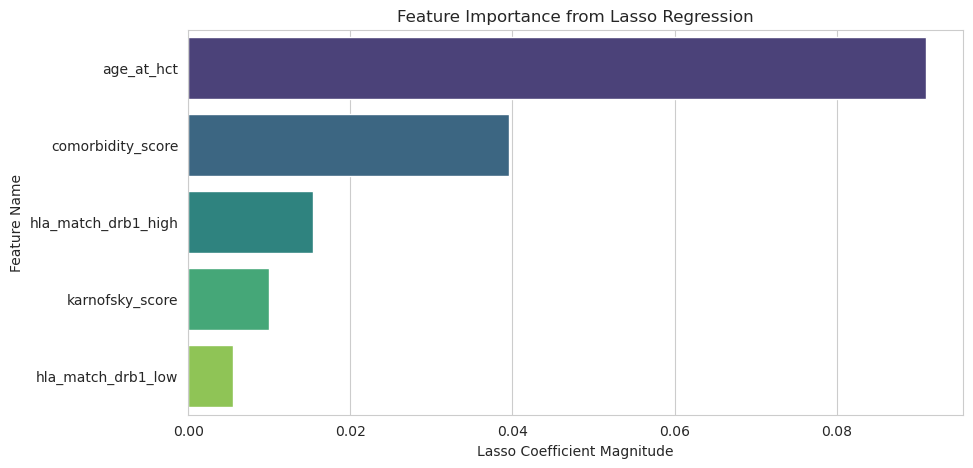

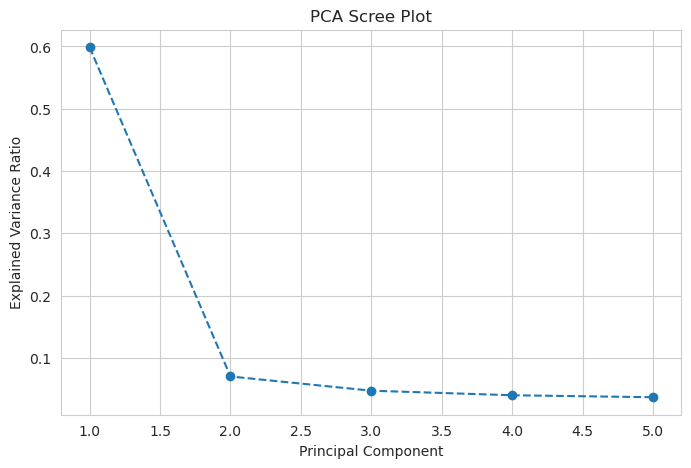

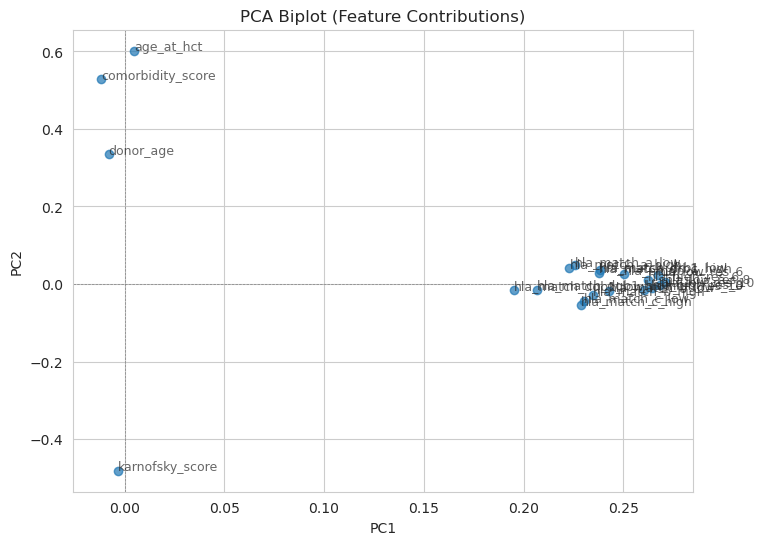

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.decomposition import PCA

# Select the numerical features
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

plt.figure(figsize=(8, 5))
sns.histplot(df['year_hct'], bins=20, kde=True, color="blue")
plt.xlabel("year_hct")
plt.ylabel("Count")
plt.title("Distribution of year_hct")
plt.show()

numerical_cols.remove('efs')  
numerical_cols.remove('efs_time')
numerical_cols.remove('ID')
numerical_cols.remove('year_hct')

# Filter the numerical features
X = df[numerical_cols]
y = df['efs']  # Or 'efs_time' depending on the target

print(X.shape)
print(X.columns)
# Handle missing values (by median)
X = X.fillna(X.median())

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Lasso Regression
lasso = Lasso(alpha=0.01)  # Adjust alpha as necessary
lasso.fit(X_scaled, y)
lasso_coef = pd.Series(lasso.coef_, index=X.columns)
lasso_coef = lasso_coef[lasso_coef != 0]  # Only keep non-zero coefficients

print("Important features from Lasso Regression (non-zero coefficients):")
print(lasso_coef)

# PCA
pca = PCA(n_components=5)  # Set the number of components to consider
X_pca = pca.fit_transform(X_scaled)

print("Explained variance by PCA components:", pca.explained_variance_ratio_)


# Sort Lasso coefficients by magnitude
lasso_coef_sorted = lasso_coef.abs().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=lasso_coef_sorted.values, y=lasso_coef_sorted.index, palette="viridis")
plt.xlabel("Lasso Coefficient Magnitude")
plt.ylabel("Feature Name")
plt.title("Feature Importance from Lasso Regression")
plt.show()

# Plot the explained variance ratio
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("PCA Scree Plot")
plt.grid(True)
plt.show()


# First 2 principal components
pc1 = pca.components_[0]
pc2 = pca.components_[1]
feature_names = X.columns

plt.figure(figsize=(8, 6))
plt.scatter(pc1, pc2, alpha=0.7)
for i, feature in enumerate(feature_names):
    plt.annotate(feature, (pc1[i], pc2[i]), fontsize=9, alpha=0.7)

plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Biplot (Feature Contributions)")
plt.show()




In [28]:
from sklearn.preprocessing import StandardScaler
from sksurv.util import Surv

# Select relevant numerical and categorical features
features = [
    'age_at_hct', 'dri_score', 'karnofsky_score', 'comorbidity_score', 'cyto_score',
    'conditioning_intensity', 'tbi_status', 'melphalan_dose', 'donor_age',
    'hla_match_a_high', 'hla_match_b_high', 'hla_match_c_high', 'hla_match_drb1_high', 
    'hla_match_dqb1_high', 'graft_type', 'donor_related', 'sex_match'
]

# Define target variables for survival analysis
event_col = "efs"  # 1 if event occurred, 0 otherwise
time_col = "efs_time"  # Time to event or censoring

# Ensure target variables are properly formatted
dataset[event_col] = dataset[event_col].astype(int)  # Convert event indicator to integer
dataset[time_col] = dataset[time_col].astype(float)  # Ensure time variable is numeric

# Automatically select numerical features
num_features = dataset[features].select_dtypes(include=[np.number]).columns.tolist()

# Drop rows with missing values in numerical features
# dataset = dataset.dropna(subset=num_features)

# Standardize only numerical features
scaler = StandardScaler()
dataset[num_features] = scaler.fit_transform(dataset[num_features])

# Convert dataset to survival format
survival_data = Surv.from_dataframe(event_col, time_col, dataset)
X = dataset[num_features]
print(X.head())
print(X.shape[0])
print(X.shape[1])

   age_at_hct  karnofsky_score  comorbidity_score  donor_age  \
0   -1.358153         0.559264          -0.853550        NaN   
1    0.238416         0.559264           0.650656   1.952535   
2   -0.220651         0.559264          -0.853550        NaN   
3    0.216664         0.559264          -0.853550  -0.870858   
4   -0.421954         0.559264          -0.352148   0.937530   

   hla_match_a_high  hla_match_b_high  hla_match_c_high  hla_match_drb1_high  \
0          0.640967          0.645742               NaN             0.635062   
1          0.640967          0.645742          0.545187             0.635062   
2          0.640967          0.645742          0.545187             0.635062   
3          0.640967          0.645742          0.545187             0.635062   
4          0.640967          0.645742          0.545187             0.635062   

   hla_match_dqb1_high  
0             0.587754  
1             0.587754  
2             0.587754  
3             0.587754  
4        

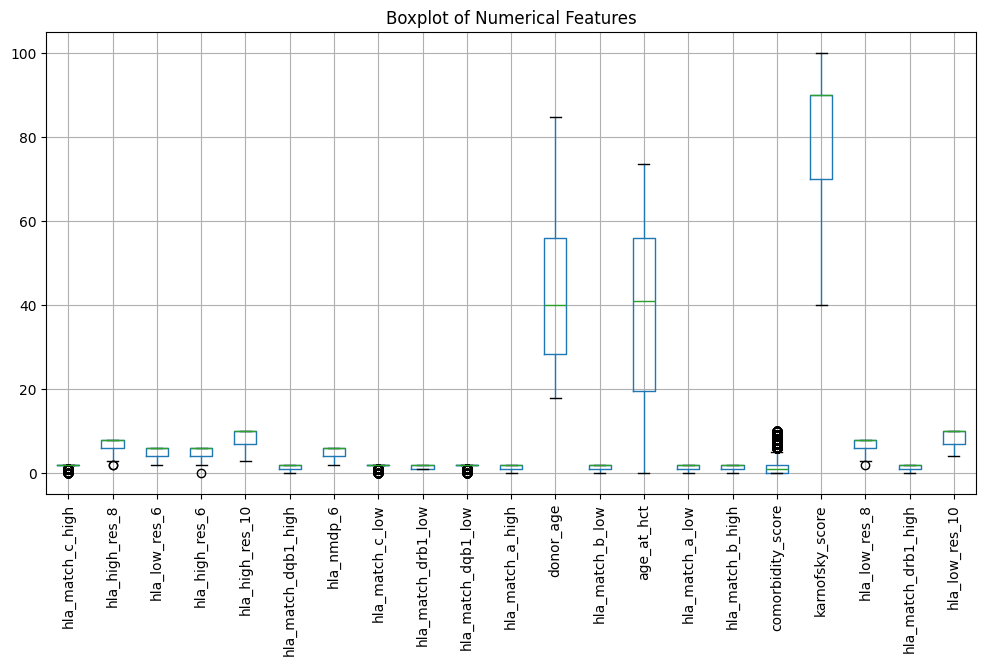

In [4]:
import seaborn as sns

numerical_cols = dataset.select_dtypes(include=['float64', 'int64']).columns
numerical_cols = numerical_cols[1:-2]  # Assuming 'ID' is the first column
numerical_cols = numerical_cols.drop('year_hct', errors='ignore')

# Plot boxplots for numerical columns
plt.figure(figsize=(12, 6))
dataset[numerical_cols].boxplot(rot=90)
plt.title("Boxplot of Numerical Features")
plt.show()

In [5]:
dataset[dataset.hla_high_res_6==0]

ID         dri_score psych_disturb    cyto_score diabetes  \
6117  6117  TBD cytogenetics            No  Intermediate      Yes   

      hla_match_c_high  hla_high_res_8 tbi_status arrhythmia  hla_low_res_6  \
6117               2.0             2.0     No TBI         No            6.0   

      ... tce_div_match             donor_related melphalan_dose  \
6117  ...           NaN  Multiple donor (non-UCB)            MEL   

     hla_low_res_8 cardiac  hla_match_drb1_high pulm_moderate  hla_low_res_10  \
6117           8.0      No                  0.0            No            10.0   

      efs efs_time  
6117  0.0   21.476  

[1 rows x 60 columns]

In [6]:
# dataset.loc[6117, ["hla_high_res_6", "hla_high_res_8", "hla_low_res_8"]] = None
column_name = "hla_low_res_8"  # Replace with the actual column name
#15276
#19736


# Calculate Q1, Q3, and IQR
Q1 = dataset[column_name].quantile(0.25)
Q3 = dataset[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define outlier threshold
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outlier rows
outliers = dataset[(dataset[column_name] < lower_bound) | (dataset[column_name] > upper_bound)]

# Display the IDs of the outliers
print(outliers["ID"])  # Replace "ID" with the actual ID column name

19736    19736
Name: ID, dtype: int64


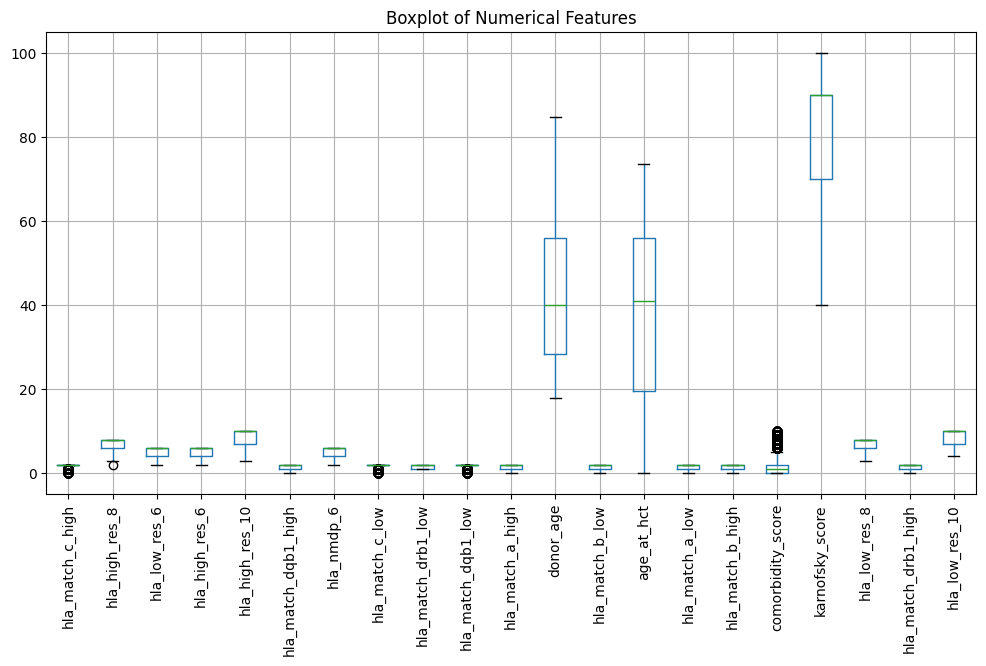

In [7]:
dataset.at[6117, "hla_high_res_6"] = None
dataset.at[15276, "hla_high_res_8"] = None
dataset.at[19736, "hla_low_res_8"] = None
numerical_cols = dataset.select_dtypes(include=['float64', 'int64']).columns
numerical_cols = numerical_cols[1:-2]  # Assuming 'ID' is the first column
numerical_cols = numerical_cols.drop('year_hct', errors='ignore')

# Plot boxplots for numerical columns
plt.figure(figsize=(12, 6))
dataset[numerical_cols].boxplot(rot=90)
plt.title("Boxplot of Numerical Features")
plt.show()


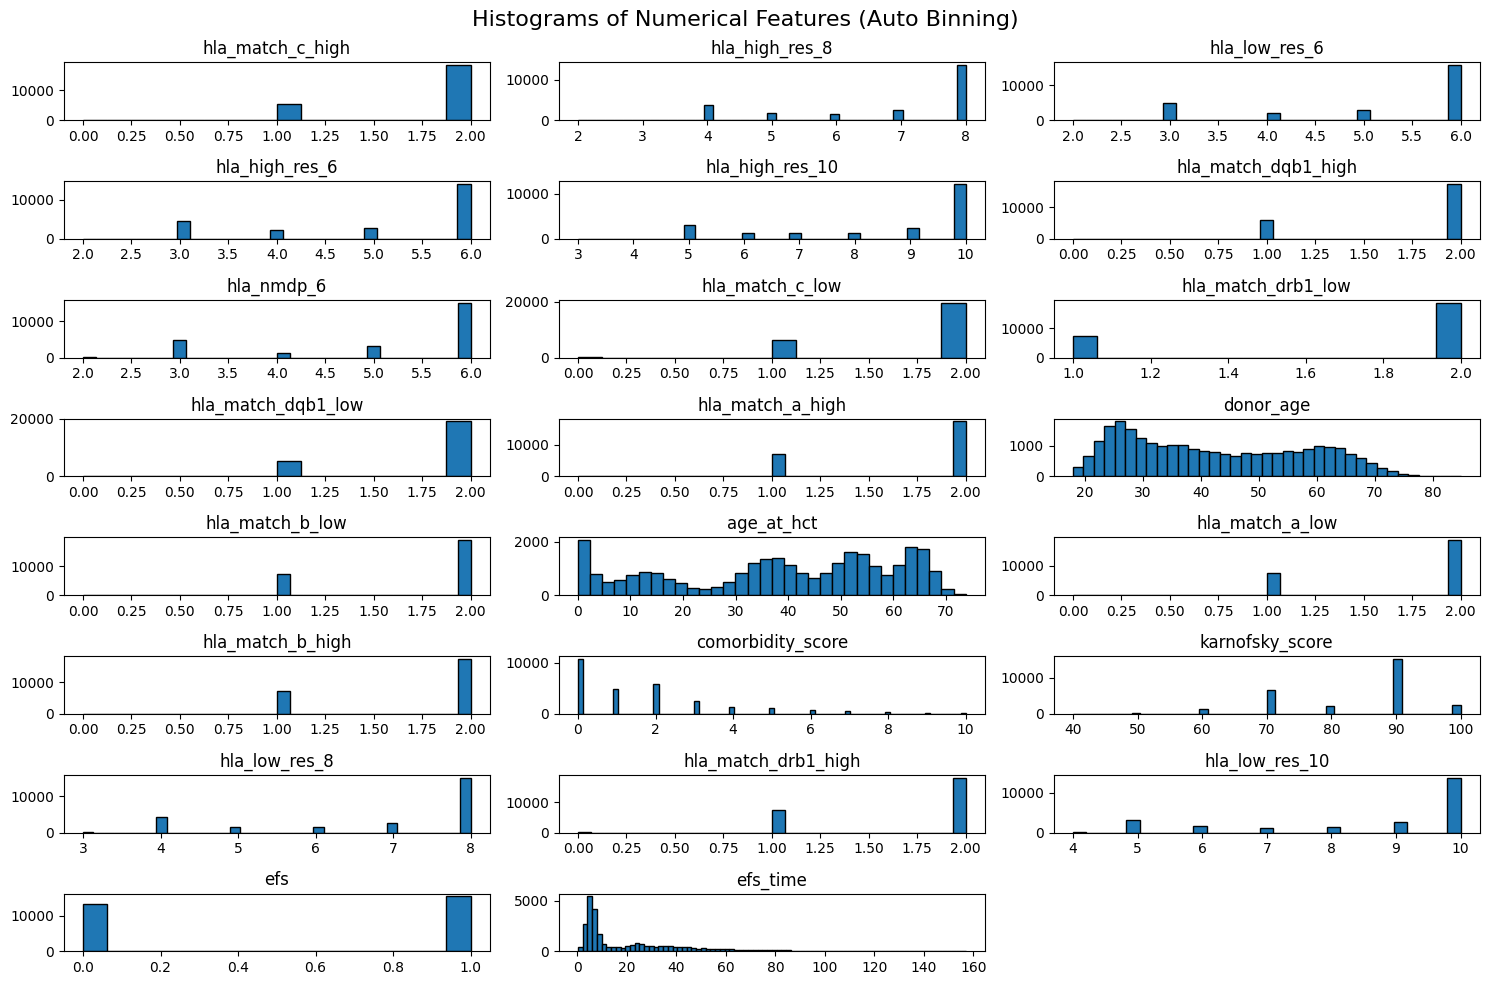

In [12]:
#For numerical columns
numerical_cols = dataset.select_dtypes(include=['float64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols) // 3 + 1, 3, i + 1)  # Arrange in grid
    plt.hist(dataset[col].dropna(), bins='auto', edgecolor='black')  # Auto binning
    plt.title(col)

plt.suptitle("Histograms of Numerical Features (Auto Binning)", fontsize=16)
plt.tight_layout()
plt.show()


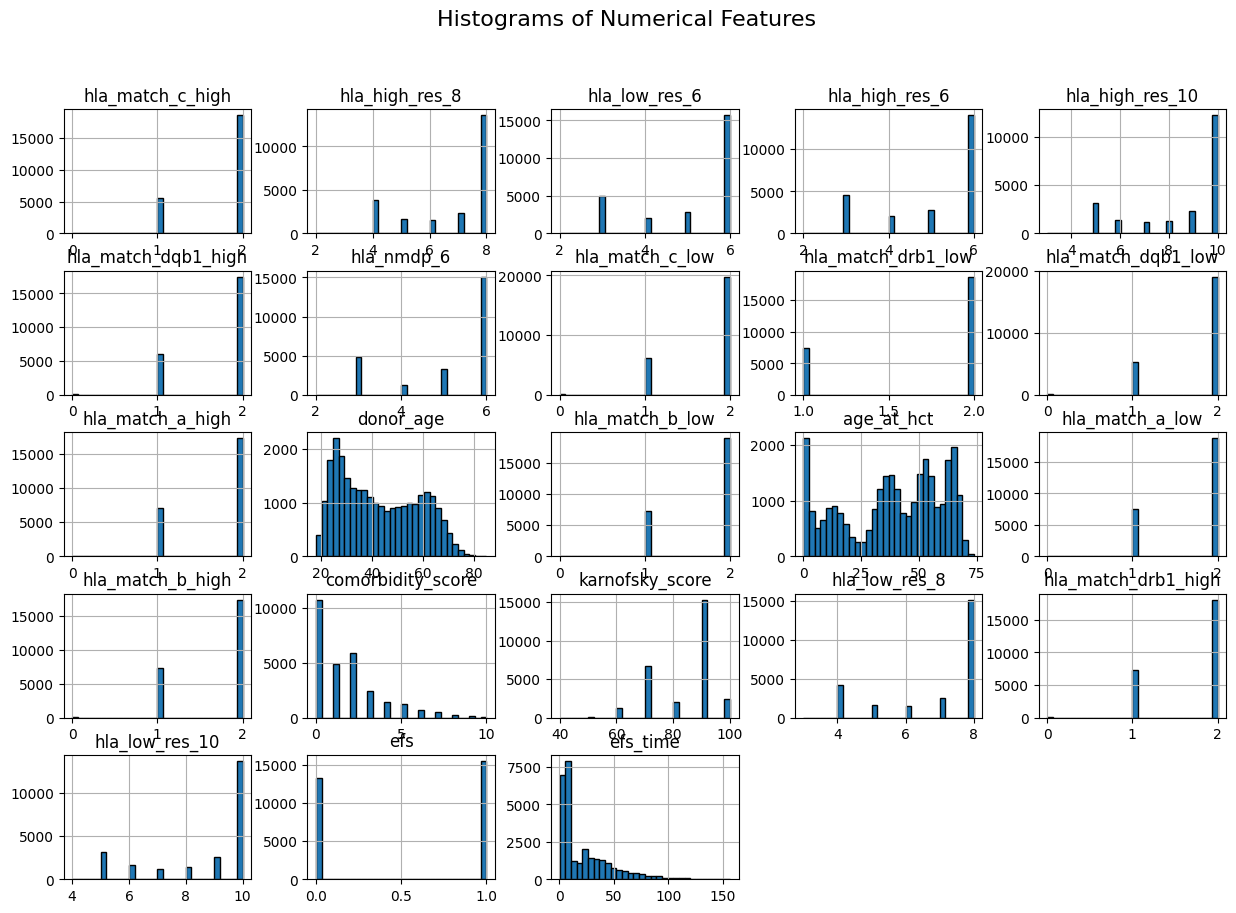

In [9]:
# import matplotlib.pyplot as plt

# numerical_cols = dataset.select_dtypes(include=['float64']).columns

dataset[numerical_cols].hist(figsize=(15, 10), bins=30, edgecolor='black')
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.show()


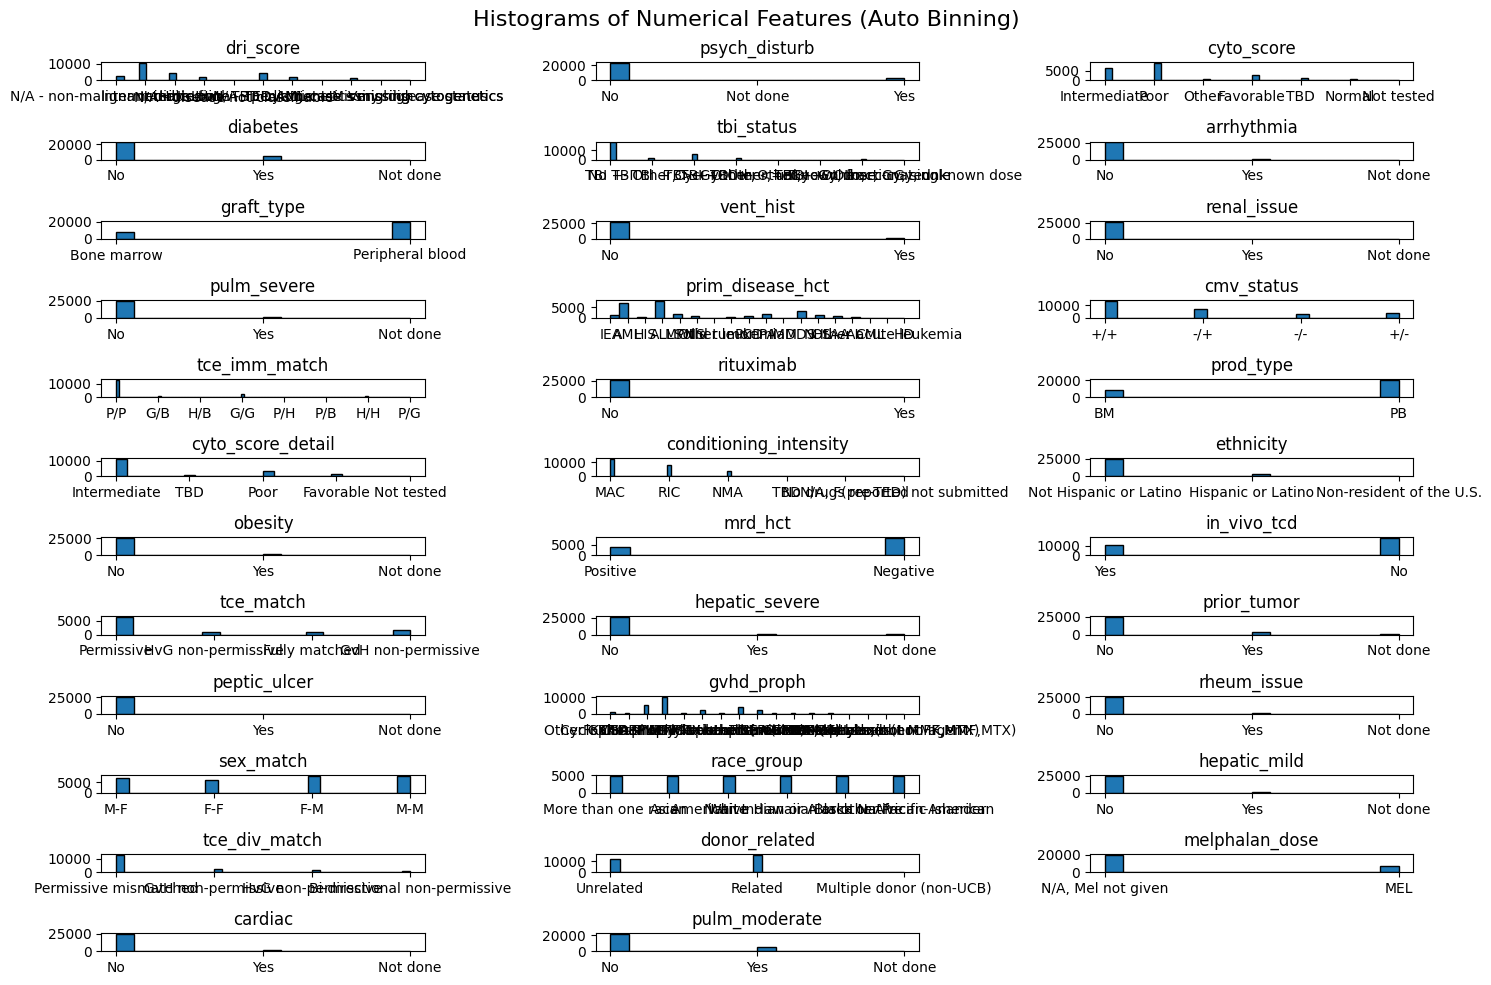

In [17]:
#non-numerical columns
non_numerical_cols = dataset.select_dtypes(include=['object']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(non_numerical_cols):
    plt.subplot(len(non_numerical_cols) // 3 + 1, 3, i + 1)  # Arrange in grid
    plt.hist(dataset[col].dropna(), bins='auto', edgecolor='black')  # Auto binning
    plt.title(col)

plt.suptitle("Histograms of Numerical Features (Auto Binning)", fontsize=16)
plt.tight_layout()
plt.show()


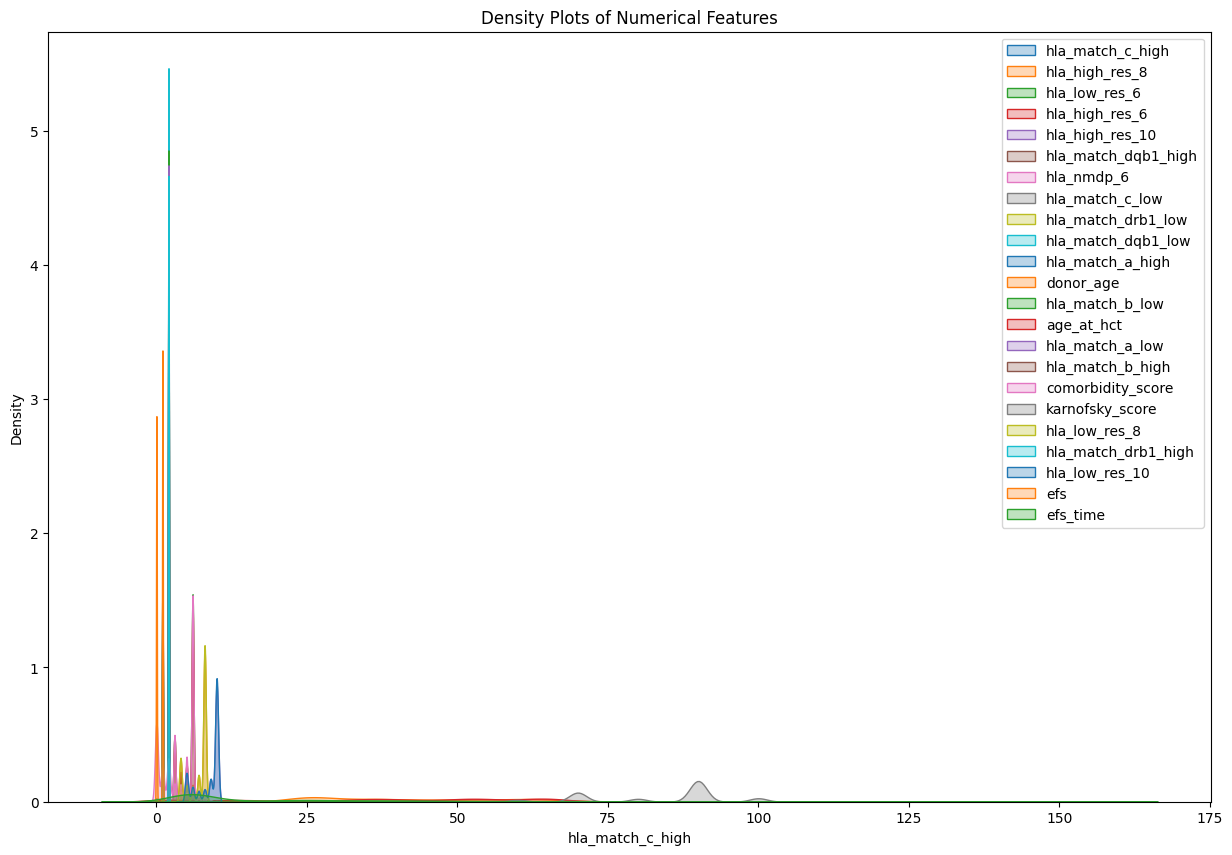

In [10]:
import seaborn as sns

plt.figure(figsize=(15, 10))
for col in numerical_cols:
    sns.kdeplot(dataset[col], label=col, fill=True, alpha=0.3)
plt.legend()
plt.title("Density Plots of Numerical Features")
plt.show()


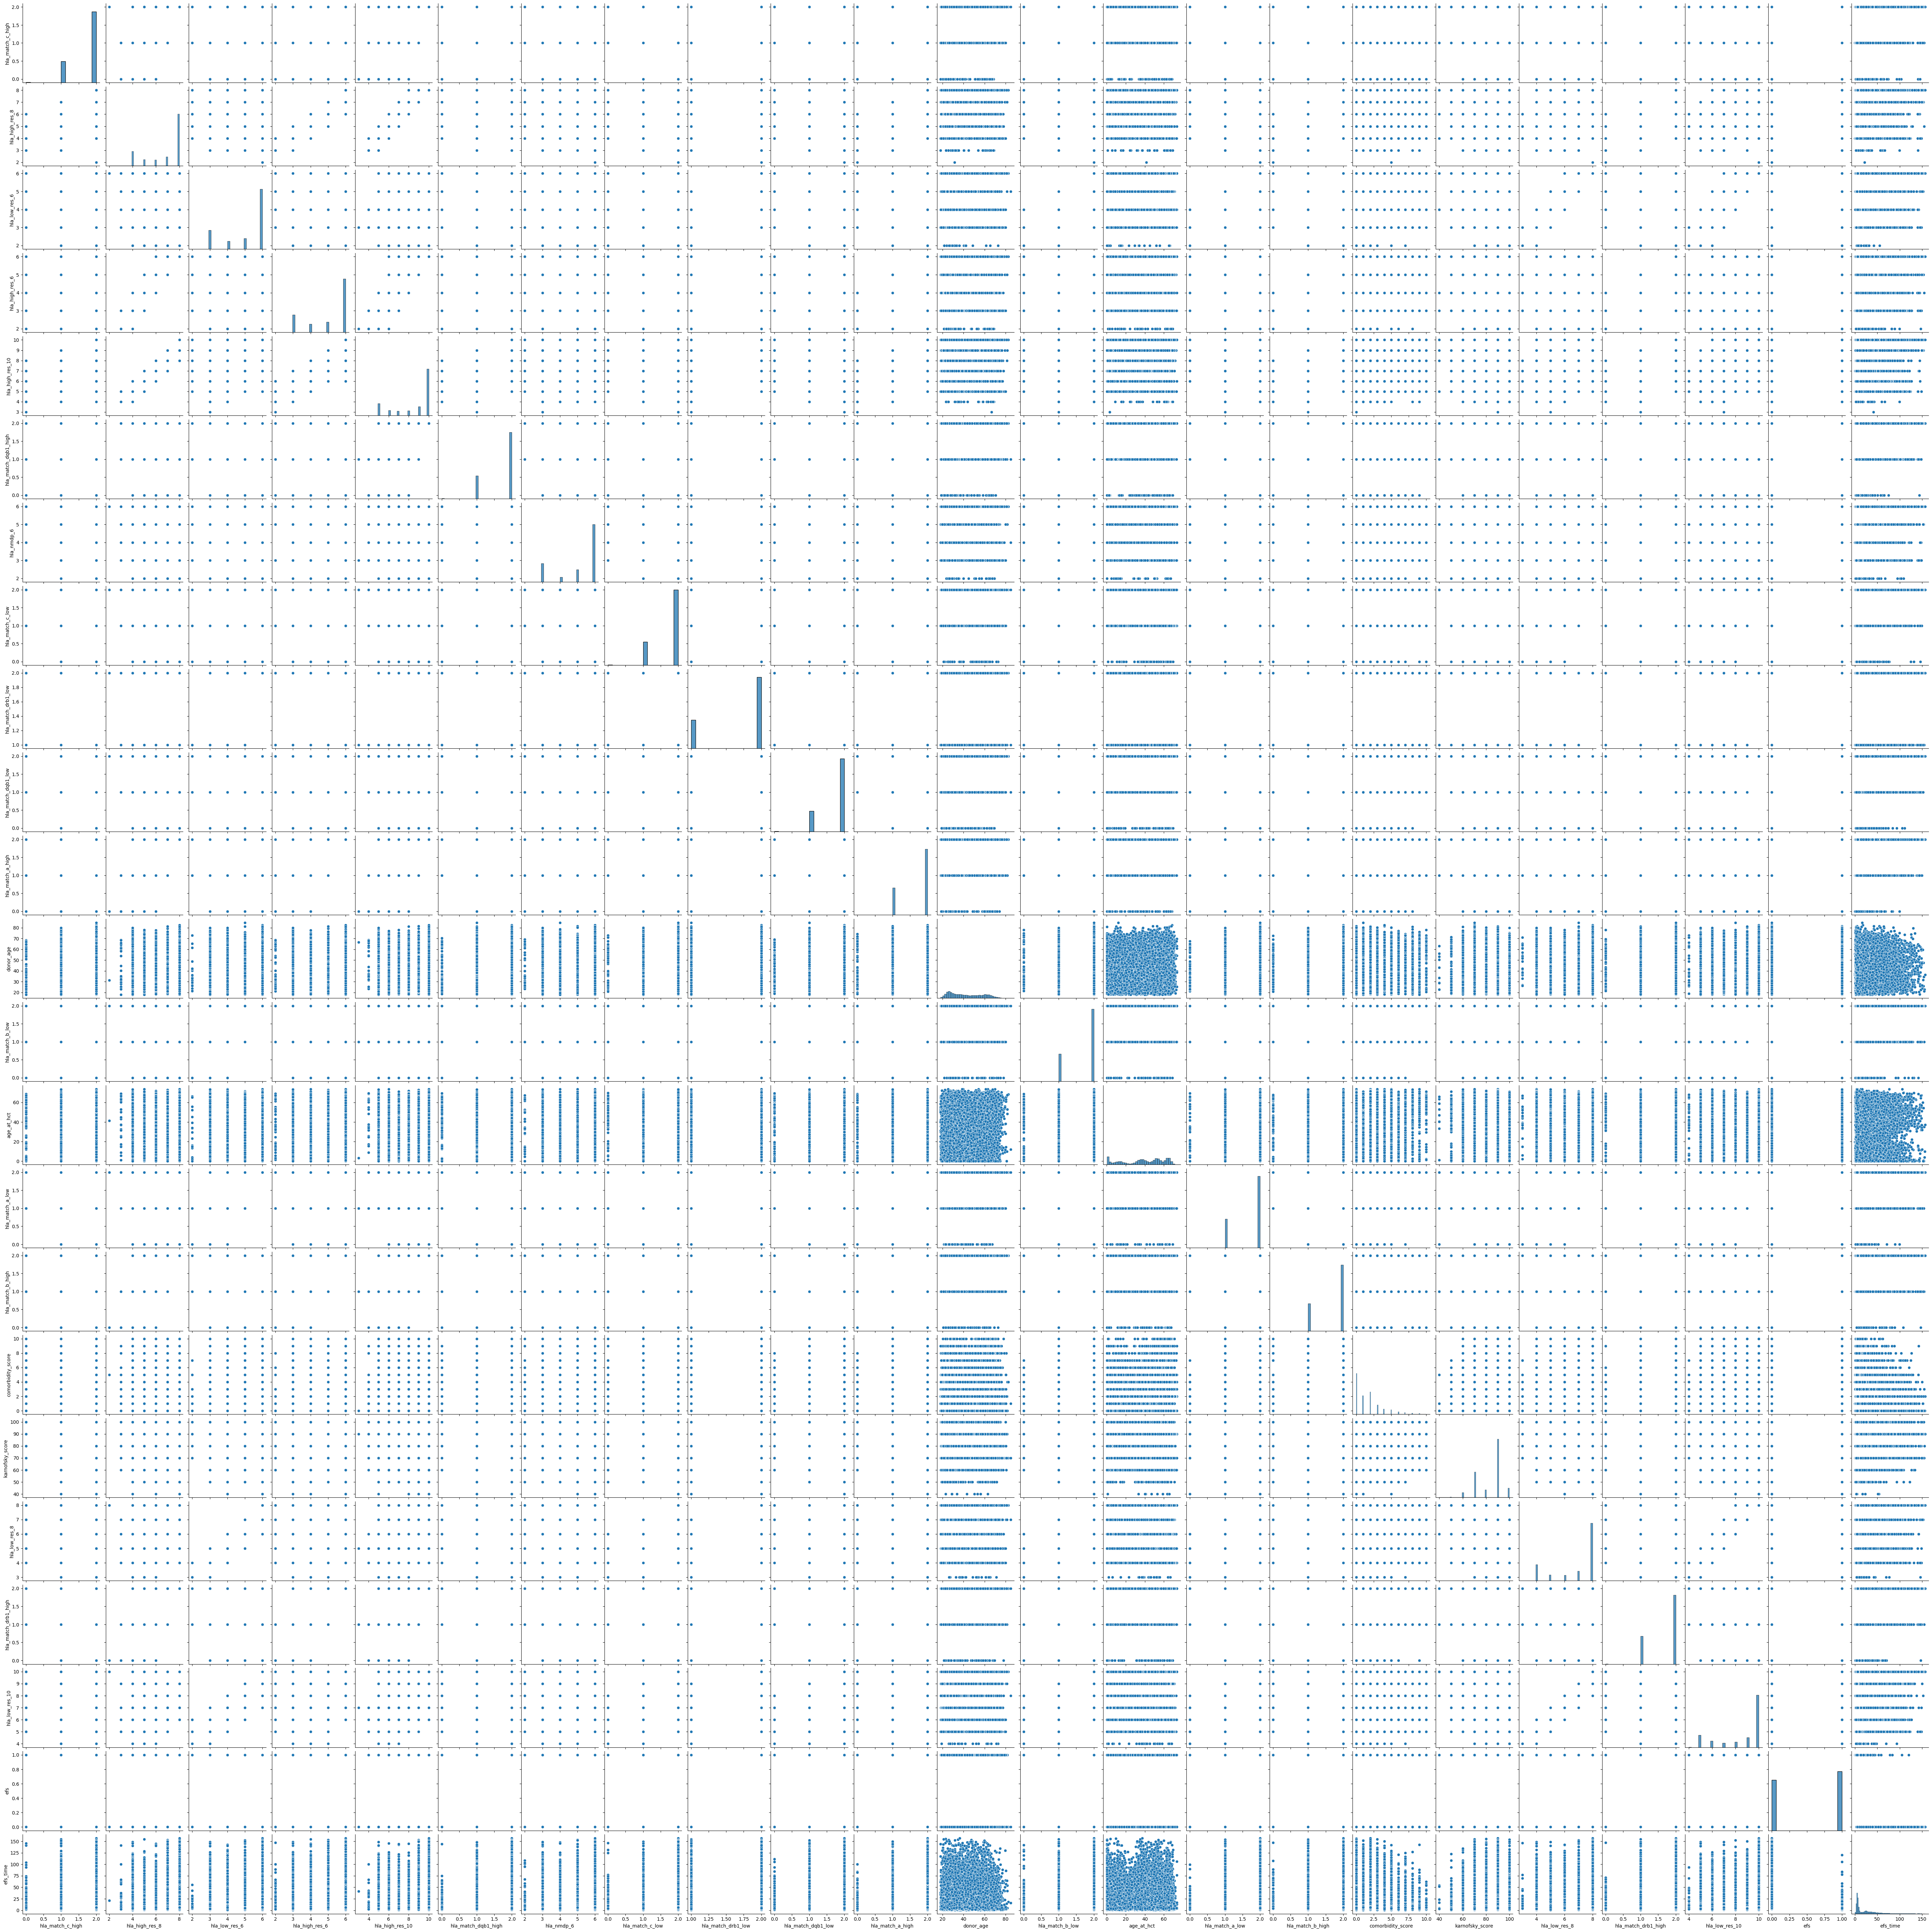

In [11]:
sns.pairplot(dataset[numerical_cols])
plt.show()


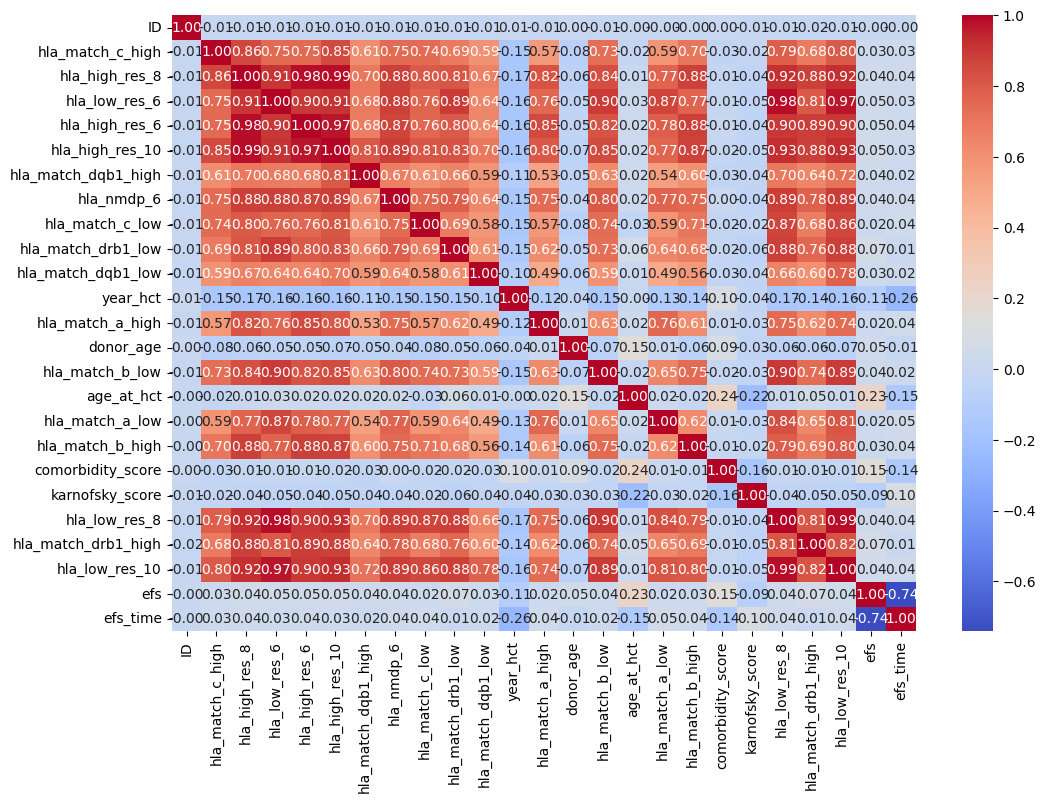

In [ ]:
import seaborn as sns

plt.figure(figsize=(12,8))
sns.heatmap(dataset.select_dtypes(include=['number']).corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.show()


In [ ]:
missing_summary = dataset.isnull().sum() / len(dataset) * 100
print(missing_summary[missing_summary > 0])

dri_score                  0.534722
psych_disturb              7.159722
cyto_score                28.013889
diabetes                   7.357639
hla_match_c_high          16.041667
hla_high_res_8            20.239583
arrhythmia                 7.645833
hla_low_res_6             11.354167
vent_hist                  0.899306
renal_issue                6.649306
pulm_severe                7.413194
hla_high_res_6            18.347222
cmv_status                 2.201389
hla_high_res_10           24.871528
hla_match_dqb1_high       18.052083
tce_imm_match             38.656250
hla_nmdp_6                14.572917
hla_match_c_low            9.722222
rituximab                  7.458333
hla_match_drb1_low         9.177083
hla_match_dqb1_low        14.562500
cyto_score_detail         41.399306
conditioning_intensity    16.628472
ethnicity                  2.038194
obesity                    6.111111
mrd_hct                   57.628472
in_vivo_tcd                0.781250
tce_match                 65

In [ ]:
dataset.head(20)


ID                       dri_score psych_disturb    cyto_score  diabetes  \
0    0  N/A - non-malignant indication            No           NaN        No   
1    1                    Intermediate            No  Intermediate        No   
2    2  N/A - non-malignant indication            No           NaN        No   
3    3                            High            No  Intermediate        No   
4    4                            High            No           NaN        No   
5    5                            High            No          Poor       Yes   
6    6                             Low            No          Poor        No   
7    7                            High            No           NaN  Not done   
8    8                    Intermediate            No         Other        No   
9    9                    Intermediate            No  Intermediate        No   
10  10                    Intermediate            No  Intermediate       Yes   
11  11  N/A - disease not classifiable      Not done           NaN       Yes   
12  12                             Low            No          Poor        No   
13  13                            High            No          Poor       Yes   
14  14                 N/A - pediatric            No           NaN        No   
15  15                             Low            No           NaN        No   
16  16                    Intermediate            No          Poor       Yes   
17  17                    Intermediate            No  Intermediate       Yes   
18  18                            High            No     Favorable        No   
19  19                 N/A - pediatric            No           NaN        No   

    hla_match_c_high  hla_high_res_8          tbi_status arrhythmia  \
0                NaN             NaN              No TBI         No   
1                2.0             8.0  TBI +- Other, >cGy         No   
2                2.0             8.0              No TBI         No   
3                2.0             8.0              No TBI         No   
4                2.0             8.0              No TBI         No   
5                2.0             7.0   TBI + Cy +- Other         No   
6                2.0             8.0              No TBI         No   
7                2.0             5.0   TBI + Cy +- Other         No   
8                NaN             NaN   TBI + Cy +- Other         No   
9                2.0             8.0              No TBI         No   
10               2.0             8.0              No TBI         No   
11               NaN             NaN  TBI +- Other, >cGy         No   
12               2.0             8.0   TBI + Cy +- Other         No   
13               2.0             8.0              No TBI         No   
14               2.0             8.0              No TBI         No   
15               2.0             8.0              No TBI         No   
16               2.0             8.0              No TBI         No   
17               NaN             NaN              No TBI         No   
18               NaN             NaN              No TBI         No   
19               2.0             8.0              No TBI         No   

    hla_low_res_6  ...          tce_div_match donor_related  \
0             6.0  ...                    NaN     Unrelated   
1             6.0  ...  Permissive mismatched       Related   
2             6.0  ...  Permissive mismatched       Related   
3             6.0  ...  Permissive mismatched     Unrelated   
4             6.0  ...  Permissive mismatched       Related   
5             4.0  ...  Permissive mismatched       Related   
6             6.0  ...  Permissive mismatched     Unrelated   
7             3.0  ...                    NaN       Related   
8             6.0  ...                    NaN       Related   
9             6.0  ...     GvH non-permissive     Unrelated   
10            6.0  ...  Permissive mismatched     Unrelated   
11            NaN  ...                    NaN       Related   
12          